1a.

$\frac{\partial f(X)}{\partial x_1}=6x_1+4x_2-5$

$\frac{\partial f(X)}{\partial x_2}=4x_2+4x_1$

Let $\frac{\partial f(X)}{\partial x_1}=0$ and $\frac{\partial f(X)}{\partial x_2}=0$, we get $X^*=[2.5, -2.5]^T$.

The solution for $X^*$ is unique because $\begin{pmatrix}6&4\\4&4\end{pmatrix}$ is invertible.

1b.

$f(X^*)=-0.25<f(0)=6$, thus $X^*$ is the minimum of $f(X)$.

1c.

$\nabla f(X)=\begin{pmatrix}6&4\\4&4\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix}+\begin{pmatrix}-5\\0\end{pmatrix}
$

$
X\leftarrow X-\alpha\nabla f(X)\implies X\leftarrow X-\alpha\left[\begin{pmatrix}6&4\\4&4\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix}+\begin{pmatrix}-5\\0\end{pmatrix}\right]
$

1d.

See the program below. The solution will not converge if $\alpha>=1$, and the iteration will end too early if $\alpha$ is too small.

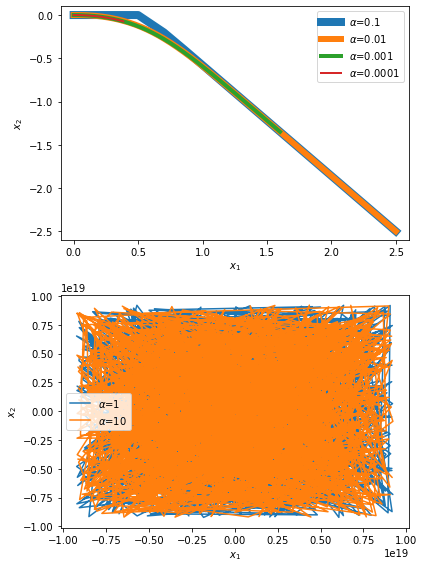

In [40]:
import numpy as np
import matplotlib.pyplot as plt
def gd_hw3_1(x0, alpha, iter):
    Q = np.array([[6,4],[4,4]])
    b = np.array([[-5],[0]])
    ret = [x0]
    x = x0
    for i in range(iter):
        x = x - alpha*(np.matmul(Q,x)+b)
        ret.append(x)
    return ret

x0 = np.array([[0],[0]])
#Alpha = [10, 1, 0.1, 0.01, 0.001, 0.0001] 
Alpha = [0.1, 0.01, 0.001, 0.0001]
plt.figure(figsize=(6,8))
plt.subplot(211)
for lw, a in enumerate(Alpha):
    X = gd_hw3_1(x0, a, 1000)
    plt.plot([x[0,0] for x in X], [x[1,0] for x in X], label = r'$\alpha$={}'.format(a), linewidth=2*(4-lw))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim((-0.1, 2.6))
plt.ylim((-2.6, 0.1))
plt.legend()
plt.subplot(212)
Alpha = [1, 10]
for a in Alpha:
    X = gd_hw3_1(x0, a, 1000)
    plt.plot([x[0,0] for x in X], [x[1,0] for x in X], label = r'$\alpha$={}'.format(a))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.tight_layout()
plt.show()

2a.

As shown by the following program, there are 6 points satisfy $f'(x)=0$.

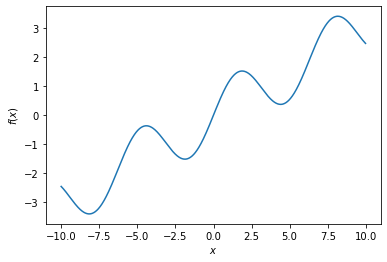

In [48]:
from math import sin
def f(x):
    return np.sin(x)+0.3*x
x = np.arange(-10, 10, 0.02)
fx = f(x)
plt.plot(x, fx)
plt.xlabel('$x$')
plt.ylabel(r'$f(x)$')
plt.show()

2b.

$f'(x)=cos(x)+0.3$

$x\leftarrow x-\alpha f'(x)\implies x\leftarrow x-\alpha(cos(x)+0.3)$

2c.

1. The solution will converge once a local minimum is found.

2. The solution will converge to the nearest local minimum that are in the same direction of the gradient.

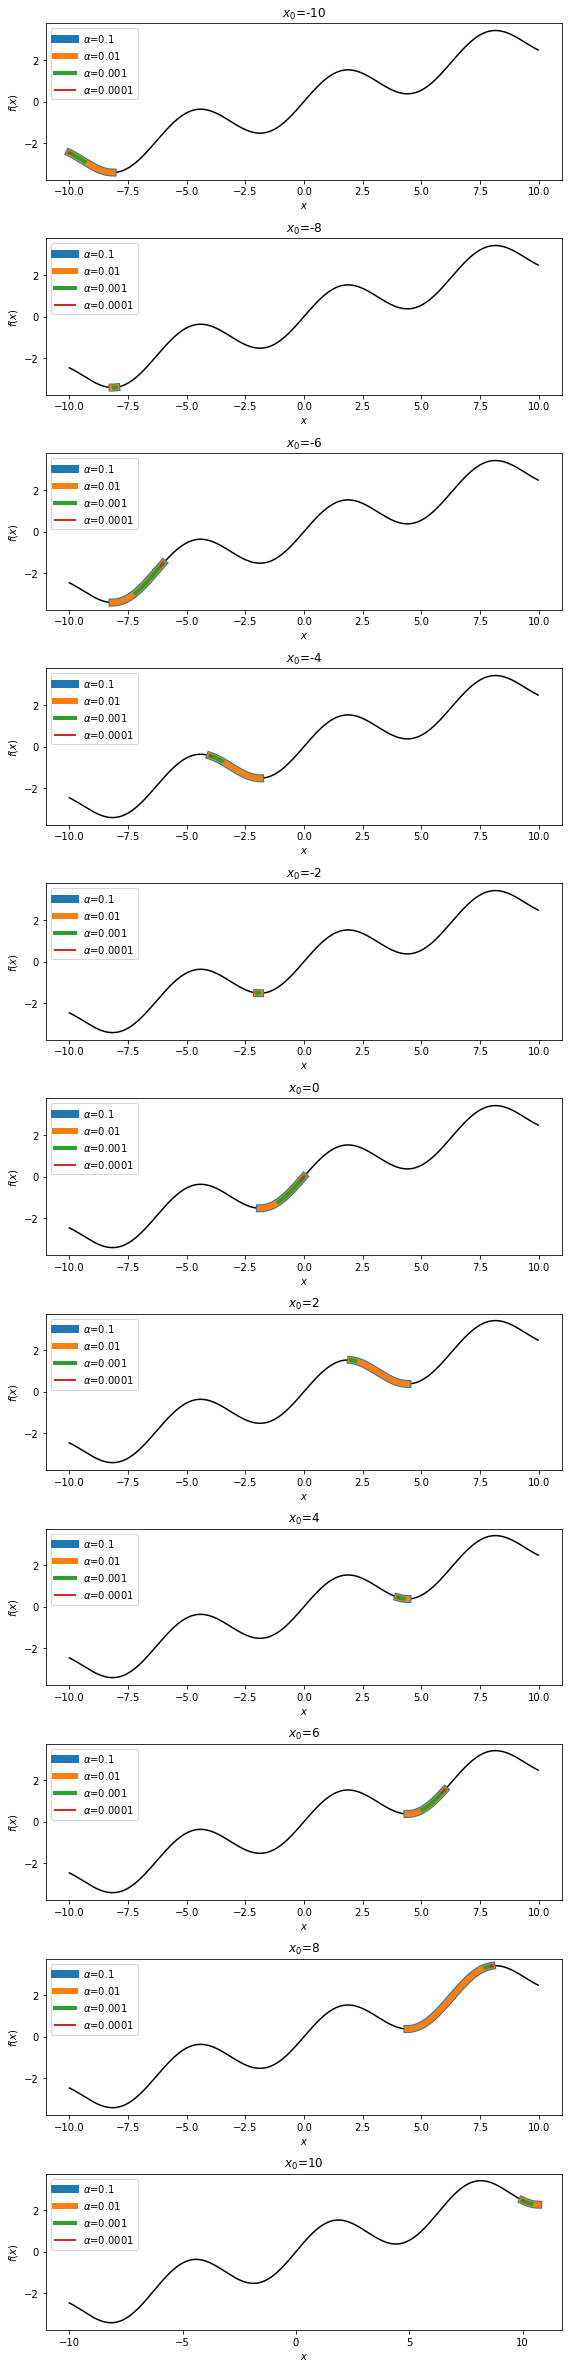

In [58]:
from math import cos
def df(x):
    return cos(x)+0.3

def gd_hw3_1(x0, alpha, iter):
    ret = [x0]
    x = x0
    for i in range(iter):
        x = x - alpha*df(x)
        ret.append(x)
    return np.array(ret)

Alpha = [0.1, 0.01, 0.001, 0.0001]
X0 = list(range(-10, 11, 2))
figNum = len(X0)
plt.figure(figsize = (8, figNum*3))
for i, x0 in enumerate(X0):
    plt.subplot(figNum, 1, i+1)
    plt.plot(x, fx, color='black')
    for lw, alpha in enumerate(Alpha):
        X = gd_hw3_1(x0, alpha, 1000)
        plt.plot(X, f(X), linewidth=2*(4-lw), label = r'$\alpha$={}'.format(alpha))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    plt.legend()
    plt.title(r'$x_0$={}'.format(x0))
plt.tight_layout()
        